In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc 

# Reading the CSV file
dataset = pd.read_csv('Churn_Modelling.csv')


In [2]:
# Checking the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Cheking the dimension of dataset
dataset.shape

(10000, 14)

In [4]:
# Conducting Exploratory Data Analysis

# Checking the datatypes for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking the data characteristics for each column
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


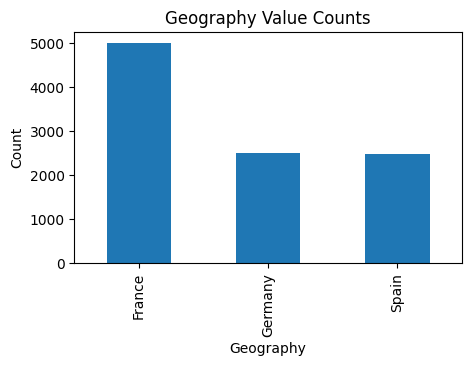

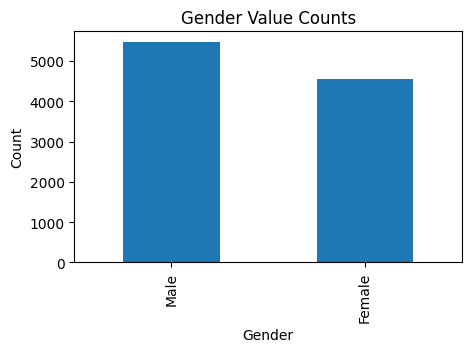

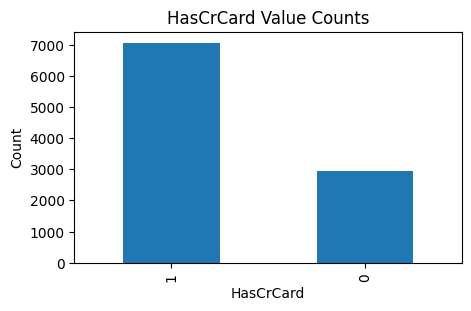

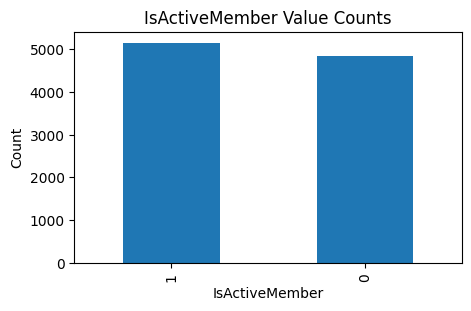

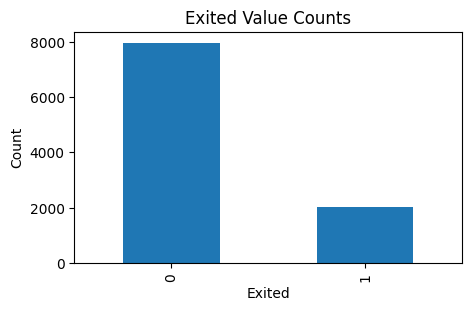

In [6]:
dataset['Geography'].value_counts().plot(kind='bar', title = 'Geography Value Counts', figsize = (5,3), xlabel = 'Geography', ylabel = 'Count')
plt.show()
dataset['Gender'].value_counts().plot(kind='bar', title = 'Gender Value Counts', figsize = (5,3), xlabel = 'Gender', ylabel = 'Count')
plt.show()
dataset['HasCrCard'].value_counts().plot(kind='bar', title = 'HasCrCard Value Counts', figsize = (5,3), xlabel = 'HasCrCard', ylabel = 'Count')
plt.show()
dataset['IsActiveMember'].value_counts().plot(kind='bar', title = 'IsActiveMember Value Counts', figsize = (5,3), xlabel = 'IsActiveMember', ylabel = 'Count')
plt.show()
dataset['Exited'].value_counts().plot(kind='bar', title = 'Exited Value Counts', figsize = (5,3), xlabel = 'Exited', ylabel = 'Count')
plt.show()

***We make the following observations from the value count bar graph:***  
***1)We have close to ~5K records for France and ~2.5K records each for Germany and Spain.***  
***2)Number of males are around 5.5K and number of females are close to 4.5K.***  
***3)Number of people with credit cards ~7K are much more in number than those without credit card ~3K***  
***4)Percentage of customers who churned (20%) are much less in number than those who didn't (80%)***  

<AxesSubplot: title={'center': 'correlation of exited with categorical variables'}>

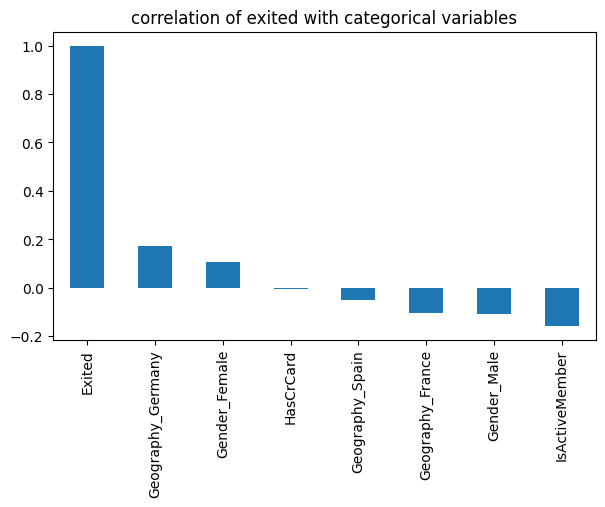

In [7]:
# Checking for correlation between categorical variables and the output variable
categorical_data = dataset[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']]
categorical_data = pd.get_dummies(categorical_data)
categorical_data.corr()['Exited'].sort_values(ascending = False).plot(kind='bar', title = 'correlation of exited with categorical variables',figsize=(7,4))

***"We can see that Geography_Germany and Gender_Female are positively correlated with 'Exited' whereas other variables are negatively correlated.***

<AxesSubplot: title={'center': 'correlation of exited with numeric variables'}>

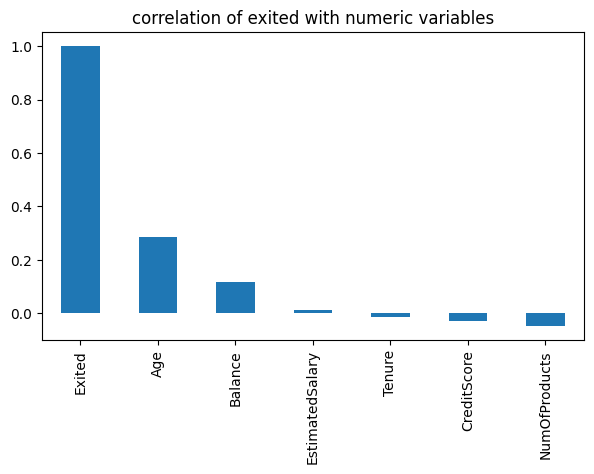

In [8]:
# Checking for correlation between numerical variables and the output variable
numeric_variables = dataset[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]]
numeric_variables.corr()['Exited'].sort_values(ascending = False).plot(kind='bar',title = 'correlation of exited with numeric variables',figsize=(7,4))

***"We see that age and balance show a positive correlation with exited whereas other columns show negative correlation"***

In [9]:
## Feature Engineering: Removing the first 3 columns as they are not relevant and removing the last column which is the output variable
X = dataset.iloc[:, 3:-1]
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Checking the X variable
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# Feature Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***We use feature scaling to normalize the variables so that they are on a similar scale***

Logistic Regression Accuracy:  0.811
Confusion Matrix (Logistic Regression):
[[1526   69]
 [ 309   96]]
Logistic Regression Precision: 0.5818181818181818
Logistic Regression Recall: 0.23703703703703705
Logistic Regression ROC AUC Score: 0.5968884244746313


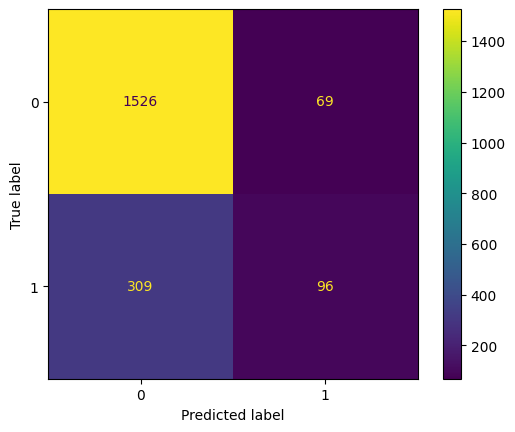


Array of cross validation scores: [0.8127734  0.80052493 0.81102362 0.81102362 0.81714786 0.79177603
 0.8117338 ]
All cross validation scores are close to each other, indicating no case of overfitting.


In [12]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))

# Evaluating model performance
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_lr)

print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression ROC AUC Score:", lr_roc_auc)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

print("")

## Using Cross-Validation techniques to check for overfitting
print("Array of cross validation scores:", cross_val_score(lr_model, X_train, y_train, cv=7))
print("All cross validation scores are close to each other, indicating no case of overfitting.")


Random Forest Accuracy:  0.859
Confusion Matrix (Random Forest):
[[1513   82]
 [ 200  205]]
Random Forest Precision: 0.7142857142857143
Random Forest Recall: 0.5061728395061729
Random Forest ROC AUC Score: 0.7273810905994814


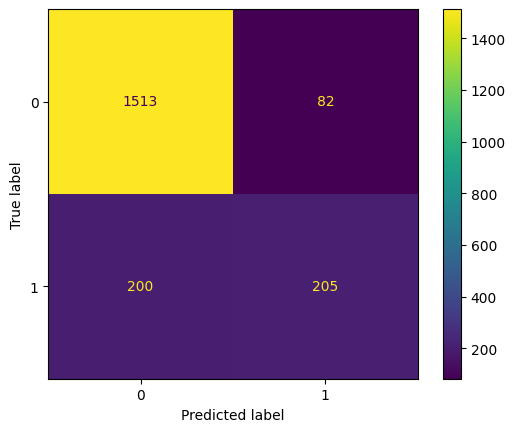

In [14]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

# Evaluating model performance
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC AUC Score:", rf_roc_auc)

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

accuracy score is: 0.853375
Best model is given by the following kernel: {'kernel': 'poly'}
SVM Accuracy:  0.857
Confusion Matrix (SVM):
[[1551   44]
 [ 242  163]]


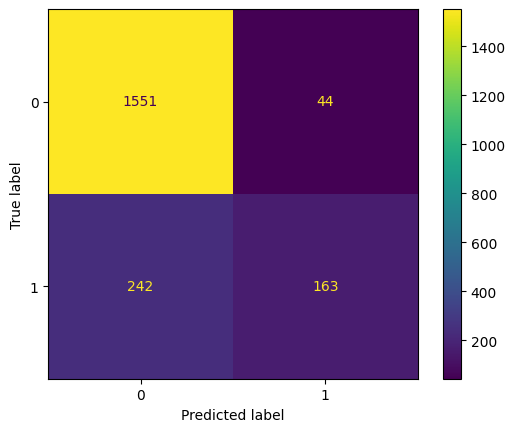

SVM Precision: 0.7874396135265701
SVM Recall: 0.4024691358024691
SVM ROC AUC Score: 0.6874414644529587


In [15]:
## SVM Model
gsearch_svc = GridSearchCV(estimator=SVC(probability=True),param_grid={'kernel': ('linear', 'poly', 'rbf')}, cv=5)
gsearch_svc.fit(X_train, y_train)

print("accuracy score is:", gsearch_svc.best_score_)

## To check which kernel gives the best model
print("Best model is given by the following kernel:", gsearch_svc.best_params_)

## Checking the accuracy score
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))

# Evaluating model performance
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

## Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, gsearch_svc.best_estimator_.predict(X_test))
plt.show()

## All metrics for SVM model
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM ROC AUC Score:", svm_roc_auc)

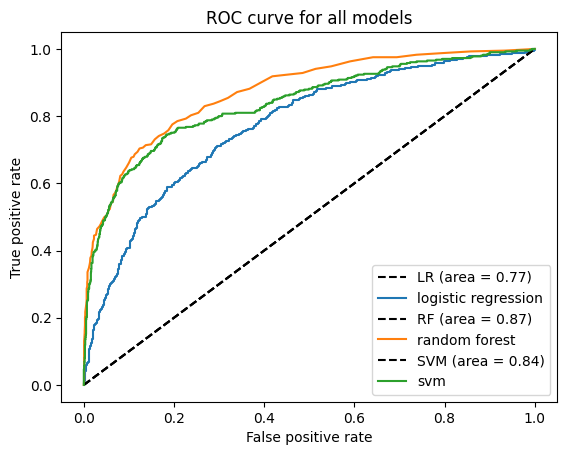

In [17]:
### Plotting the ROC Curve for all models  

y_pred_lr1 = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr1)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1], 'k--', label='LR (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lr, tpr_lr, label='logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")


y_pred_rf1 = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], 'k--', label='RF (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_rf, tpr_rf, label='random forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")


y_pred_svm1 = gsearch_svc.best_estimator_.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm1)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot([0, 1], [0, 1], 'k--', label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm, tpr_svm, label='svm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.title('ROC curve for all models')
plt.show()

***The area under the curve for Random Forest model is the highest (0.87) and hence it can more accurately distinguish between 1 and 0 for the exited variable. Moreover, the recall rate for Random forest is also the maximum (0.5), which means the model is able to correctly identify a high proportion of customers who are likely to churn or close their accounts in the future. Our goal is to reduce customer churn and therefore identify as many customers as possible who are going to churn. Hence, we will select the Random Forest Model to make the prediction.***